In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set_theme(font="Times New Roman",font_scale=1)

# Taller 1
Jhon F. Moreno T.

<h2>1</h2>
<p>¿Cuál es la diferencia entre una posición larga y una posición corta en un forward?,¿En una opción?</p>

<h3 style="color:red">R://</h3>

 + En un forward, una posición larga ***(call/put)*** es un derecho a ***(comprar/vender)*** el activo subyacente en una fecha futura **T** a un precio determinado **S**; mientras que una posición corta ***(call/put)*** es la obligación de ***(vender/comprar)*** el activo subyacente en el tiempo **T** a un precio **S**.
 
 
 + En una opción, una posición larga ***(call/put)*** es una opción a ***(comprar/vender)*** el activo subyacente en una fecha futura **T** a un precio determinado **k**; mientras que una posición corta ***(call/put)*** es la opción de ***(vender/comprar)*** el activo subyacente en el tiempo **T** a un precio **k**. A diferencia del forward la opción no es un contrato obligante y da a su poseedor el derecho más no la obligación de negociar el subyacente.

<h2>2</h2>
<p>¿Cuál es la diferencia entre tener una posición larga en forward con precio forward de 80, y tomar una
posición larga en una opción call con strike 80?</p>

<h3 style="color:red">R://</h3>

Dado que el forward es un contrato obligante la negociación del mismo es un juego de suma 0, es decir, la ganancia/pérdida que asume el comprador es exactamente igual al inverso de la ganancia/pérdida que asume el vendedor. Ahora bien, como la opción no es un contrato obligante esta igualdad no se cumple y el riesgo de la operación debe ser cubierto por una "prima de riesgo" que es un valor definido en el contrato en caso de no ejercer la opción, por ende, pese a que en ambos una posición larga call da el derecho de comprar el activo subyacente en una fecha futura, en el caso de las opciones además se debe asumir ex-ante una prima de riesgo.

<h2>3</h2>
<p>Explique de forma detallada la diferencia entre vender una opción call y comprar un opción put.</p>

In [52]:
class pay_offs():
    def __init__(self, derivative,position,typeOff):
        self.derivative = derivative
        self.position = position
        self.typeOff = typeOff
        
    def options(self,prima,K):
        
        if self.position == "largo" and self.typeOff == "call":
            St = np.arange(0,100,1)
            K = K
            prima = prima
            K_St = St-K-prima
            # Y = max{K-St-prima,-prima}
            Y = [max(i,-prima) for i in K_St]

            fig = plt.figure(figsize=(10,7))
            plt.xlim((0,100))
            plt.ylim((-100,100))
            plt.axhline(0, color="darkgrey")
            plt.axvline(0, color="darkgrey", linestyle = '--')
            plt.axvline(K+prima,color="salmon",linestyle = '--')

            plt.plot(St,Y)

            #Se ejerce
            plt.fill_between([i for i in St if i >= K+prima],-100,100, color="green", alpha=0.1 )
            plt.annotate("""
            St > K
            Se ejerce la opción
            """, xy=((100+(K+prima))/2.3,50),xycoords='data',xytext=((100+(K+prima))/2.3, 50), textcoords='data',color="green",fontsize=14)

            #No se ejerce
            plt.fill_between([i for i in St if i <= K+prima],-100,100, color="salmon", alpha=0.1 )
            plt.annotate("""
            St <= K
            No Se ejerce la opción
            """, xy=((100-(K+prima))/2.3,50),xycoords='data',xytext=((100-(K+prima))/2.3, 50),color="salmon",fontsize=14)

            #Pérdidas

            if prima > 0:
                limit = [(ix, i) for (ix, i) in enumerate(Y) if i == 0][0][0]
                plt.fill_between([i for i in St if i <= limit],0,[i for i in Y if i <= 0], color="salmon", alpha=0.3 )
                plt.annotate("""Pérdidas""", xy=((K-prima),2),xycoords='data',xytext=((K-prima), 2), textcoords='data',color="red",fontsize=14)
            plt.title("Pay-off Opción Largo Call")
            plt.xlabel('S')
            plt.ylabel('Balance')
            plt.show()
            
        if self.position == "largo" and self.typeOff == "put":
            St = np.arange(0,100,1)
            K = K
            prima = prima
            K_St = K-St-prima
            # Y = max{K-St-prima,-prima}
            Y = [max(i,-prima) for i in K_St]

            fig = plt.figure(figsize=(10,7))
            plt.xlim((0,100))
            plt.ylim((-100,100))
            plt.axhline(0, color="darkgrey")
            plt.axvline(0, color="darkgrey", linestyle = '--')
            plt.axvline(K-prima,color="salmon",linestyle = '--')

            plt.plot(St,Y)

            #Se ejerce
            plt.fill_between([i for i in St if i <= K-prima],-100,100, color="green", alpha=0.1 )
            plt.annotate("""
            St <= K
            Se ejerce la opción
            """, xy=((60-(K+prima))/2.3,50),xycoords='data',xytext=((60-(K+prima))/2.3, 50), textcoords='data',color="green",fontsize=14)

            #No se ejerce
            plt.fill_between([i for i in St if i >= K-prima],-100,100, color="salmon", alpha=0.1 )
            plt.annotate("""
            St > K
            No Se ejerce la opción
            """, xy=((100+(K))/2.5,50),xycoords='data',xytext=((100+(K))/2.5, 50),color="salmon",fontsize=14)

            #Pérdidas

            if prima > 0:
                limit = [(ix, i) for (ix, i) in enumerate(Y) if i == 0][0][0]
                plt.fill_between([i for i in St if i >= limit],0,[i for i in Y if i <= 0], color="salmon", alpha=0.3 )
                plt.annotate("""Pérdidas""", xy=((K-prima)+10,1),xycoords='data',xytext=((K-prima)+10, 1), textcoords='data',color="red",fontsize=14)
            plt.title("Pay-off Opción Largo Put")
            plt.xlabel('S')
            plt.ylabel('Balance')
            plt.show()
            
        if self.position == "corto" and self.typeOff == "call":
            St = np.arange(0,100,1)
            K = K
            prima = prima
            St_k_prima = St-K-prima
            # Y = -max{St-K-prima,-prima}
            Y = [-max(i,-prima) for i in St_k_prima]

            fig = plt.figure(figsize=(10,7))
            plt.xlim((0,100))
            plt.ylim((-100,100))
            plt.axhline(0, color="darkgrey")
            plt.axvline(0, color="darkgrey", linestyle = '--')
            plt.axvline(K+prima,color="salmon",linestyle = '--')

            plt.plot(St,Y)

            #Se ejerce
            plt.fill_between([i for i in St if i >= K+prima],-100,100, color="green", alpha=0.1 )
            plt.annotate("""
            St > K
            Se ejerce la opción
            """, xy=((100+(K+prima))/2.3,50),xycoords='data',xytext=((100+(K+prima))/2.3, 50), textcoords='data',color="green",fontsize=14)

            #No se ejerce
            plt.fill_between([i for i in St if i <= K+prima],-100,100, color="salmon", alpha=0.1 )
            plt.annotate("""
            St <= K
            No Se ejerce la opción
            """, xy=((100-(K+prima))/2.3,50),xycoords='data',xytext=((100-(K+prima))/2.3, 50),color="salmon",fontsize=14)

            #Pérdidas

            if prima > 0:
                limit = [(ix, i) for (ix, i) in enumerate(Y) if i == 0][0][0]
                plt.fill_between([i for i in St if i <= limit],0,[i for i in Y if i >= 0], color="salmon", alpha=0.3 )
                plt.annotate("""Pérdidas""", xy=(15,prima+2),xycoords='data',xytext=(15, prima+2), textcoords='data',color="red",fontsize=14)
            plt.title("Pay-off Opción Corto Call")
            plt.xlabel('S')
            plt.ylabel('Balance')
            plt.show()
        
            
        if self.position == "corto" and self.typeOff == "put":
            St = np.arange(0,100,1)
            K = K
            prima = prima
            K_St = K-St-prima
            # Y = max{K-St-prima,-prima}
            Y = [-max(i,-prima) for i in K_St]

            fig = plt.figure(figsize=(10,7))
            plt.xlim((0,100))
            plt.ylim((-100,100))
            plt.axhline(0, color="darkgrey")
            plt.axvline(0, color="darkgrey", linestyle = '--')
            plt.axvline(K-prima,color="salmon",linestyle = '--')

            plt.plot(St,Y)

            #Se ejerce
            plt.fill_between([i for i in St if i <= K-prima],-100,100, color="green", alpha=0.1 )
            plt.annotate("""
            St <= K
            Se ejerce la opción
            """, xy=((100-(K+prima))/2.3,50),xycoords='data',xytext=((100-(K+prima))/2.3, 50), textcoords='data',color="green",fontsize=14)

            #No se ejerce
            plt.fill_between([i for i in St if i >= K-prima],-100,100, color="salmon", alpha=0.1 )
            plt.annotate("""
            St > K
            No Se ejerce la opción
            """, xy=((100+(K+prima))/2.3,50),xycoords='data',xytext=((100+(K+prima))/2.3, 50),color="salmon",fontsize=14)

            #Pérdidas

            if prima > 0:
                limit = [(ix, i) for (ix, i) in enumerate(Y) if i == 0][0][0]
                plt.fill_between([i for i in St if i >= limit],0,[i for i in Y if i >= 0], color="salmon", alpha=0.3 )
                plt.annotate("""Pérdidas""", xy=((K-prima)+10,-1),xycoords='data',xytext=((K-prima)+10, -1), textcoords='data',color="red",fontsize=14)
            plt.title("Pay-off Opción Corto Put")
            plt.xlabel('S')
            plt.ylabel('Balance')
            plt.show()
        
        return Y, K
    

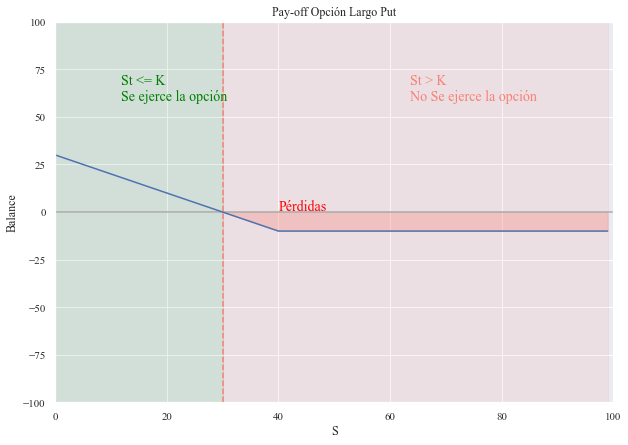

In [53]:
l = pay_offs(derivative="Opción",position="largo",typeOff="put").options(prima=10,K=40)

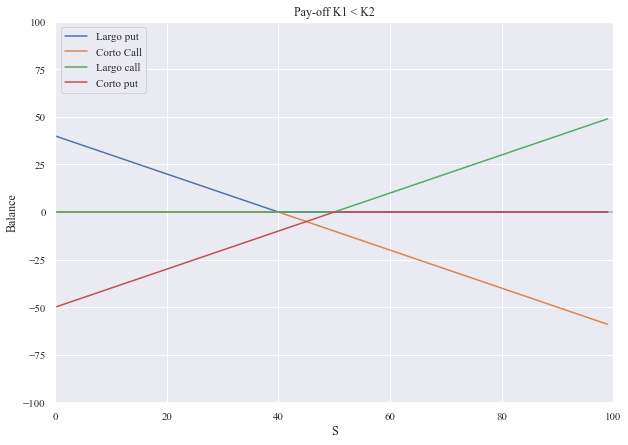

In [82]:
St = np.arange(0,100,1)

K1 = 40 
prima = 0

K_St1 = K1-St-prima
Y1 =  [max(i,-prima) for i in K_St1]


K2 = 50
K_St = St-K2-prima
# Y = max{K-St-prima,-prima}
Y2 = [max(i,-prima) for i in K_St]


St_k_prima = St-K1-prima
Y3 = [-max(i,-prima) for i in St_k_prima]

K_St = K2-St-prima
# Y = max{K-St-prima,-prima}
Y4 = [-max(i,-prima) for i in K_St]


fig = plt.figure(figsize=(10,7))
plt.xlim((0,100))
plt.ylim((-100,100))
plt.axhline(0, color="darkgrey")
plt.axvline(0, color="darkgrey", linestyle = '--')
# plt.axvline(K,color="salmon",linestyle = '--')

plt.plot(St,Y1, label="Largo put")
plt.plot(St,Y3, label="Corto Call")
plt.plot(St,Y2, label="Largo call")
plt.plot(St,Y4, label="Corto put")
# plt.plot(St,Y3, label="Resultado")
plt.title("Pay-off K1 < K2")
plt.xlabel('S')
plt.ylabel('Balance')
plt.legend(loc="upper left")
plt.show()

In [71]:
1-(1+0-0.8)/(1.1-0.8)

0.3333333333333336